In [ ]:
import glob
import os
import librosa
import time
import numpy as np
import pandas as pd
from google.colab import drive

In [ ]:

import soundfile
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
!pip install librosa soundfile numpy sklearn pyaudio
!pip install soundfile

In [ ]:
drive.mount('/content/drive')
mylist= os.listdir('/content/drive/MyDrive/Speech_Emotion_Dataset')

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions = ['sad','angry','happy','disgust','surprised','neutral','calm','fear']

In [ ]:
def extract_feature(file_name, mfcc):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    return result

In [ ]:
def dataset_options():
    # choose datasets
    ravdess = True
    tess = True
    data = {'ravdess':ravdess, 'tess':tess}
    print(data)
    return data

In [ ]:
def load_data(test_size=0.2): 
    x,y=[],[]
    # feature to extract
    mfcc = True
    data = dataset_options()
    paths = []
    for file in glob.glob("/content/drive/MyDrive/Speech_Emotion_Dataset/RAVDESS/Actor_*/*.wav"):
      file_name=os.path.basename(file)
      emotion=emotions[file_name.split("-")[2]] #to get emotion according to filename. dictionary emotions is defined above.
      if emotion not in observed_emotions:
        continue
      feature=extract_feature(file, mfcc)
      x.append(feature)
      y.append(emotion)
      #print(emotion)
    for file in glob.glob("/content/drive/MyDrive/Speech_Emotion_Dataset/TESS/*AF_*/*.wav"):
      file_name=os.path.basename(file)
      emotion=file_name.split("_")[2][:-4] #split and remove .wav
      if emotion == 'ps':
        emotion = 'surprised'
      if emotion not in observed_emotions:
        continue
      feature=extract_feature(file, mfcc)
      x.append(feature)
      y.append(emotion)
    return {"X":x,"y":y}

In [ ]:
start_time = time.time()

Trial_dict = load_data(test_size = 0.3)

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 1078.7360014915466 seconds ---


In [ ]:
X = pd.DataFrame(Trial_dict["X"])
y = pd.DataFrame(Trial_dict["y"])

In [ ]:
X.shape, y.shape

((4240, 40), (4240, 1))

In [ ]:
#renaming the label column to emotion
y=y.rename(columns= {0: 'emotion'})

In [ ]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X, y], axis =1)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-709.656799,40.046787,-12.663892,14.289744,-11.523742,-4.713324,-11.006041,-7.780188,-9.738142,-0.064098,...,0.564891,-0.604778,0.412333,0.832660,0.648054,-0.401480,-1.567444,-1.947383,-0.122873,neutral
1,-712.722839,37.307137,-9.962419,11.135132,-10.132971,-3.654114,-12.161099,-8.386430,-7.812816,-1.021640,...,1.387298,0.977230,2.593780,0.494666,0.580458,-1.125470,0.051879,-0.338575,0.202539,neutral
2,-730.511536,44.470074,-6.104879,11.642843,-8.931446,-2.112169,-10.754205,-7.132568,-7.912855,-0.257285,...,2.885748,0.911373,1.183251,0.024331,-0.220987,-0.444178,0.156907,0.166603,0.989647,neutral
3,-719.257080,39.715313,-10.153728,12.015521,-10.139829,-3.085211,-10.823732,-7.937528,-8.334857,-1.391561,...,3.010237,2.001823,2.259433,2.297656,3.266330,2.130972,1.328138,-1.284988,-1.071648,neutral
4,-487.759247,36.763618,-42.028095,2.749288,-21.191448,-15.117384,-14.915025,-16.424610,-15.434681,-2.373158,...,1.616179,-0.217549,1.289088,2.126529,2.677948,-0.160821,-1.883824,-0.160466,0.429813,happy


In [ ]:
data.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39, 'emotion'],
      dtype='object')

In [ ]:
#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [ ]:
# Storing shuffled ravdess and tess data to avoid loading again
data.to_csv("DATASET_MFCC_Features.csv")

In [ ]:
data = pd.read_csv('/content/DATASET_MFCC_Features.csv')

print(data.head())

   Unnamed: 0           0          1          2          3          4  \
0        2576 -311.539459  38.815189 -25.405521  32.583420 -18.065561   
1        3718 -387.044586  61.524803 -11.668876   2.633571 -19.539165   
2        2811 -348.538940  13.725370  -5.922719  17.895178 -28.636814   
3         245 -654.800598  63.572536  -3.336874  12.813547   6.590154   
4        1423 -533.863159  62.632484 -20.536186  11.959706  -5.393752   

          5          6          7          8  ...        31        32  \
0 -4.946988 -19.265636 -11.036897   0.618637  ...  5.757514  9.483214   
1  7.810312 -29.962536  -6.673272 -23.859554  ...  0.230955  9.085365   
2  4.418348  -6.295747  -5.479540 -14.395909  ...  8.861150  6.953389   
3  3.107066  -5.813488  -1.849328 -11.161559  ... -1.021406 -4.232877   
4 -1.373584 -15.795280  -4.240396  -6.763741  ... -0.664808  0.435301   

         33        34        35        36        37        38        39  \
0  6.530617 -0.125285 -1.135977  1.372565  1.23

In [ ]:
data.shape

(4240, 42)

In [ ]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'emotion'],
      dtype='object')

In [ ]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [ ]:
data.shape

(4240, 41)

In [ ]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [ ]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [ ]:
X.shape, y.shape

((4240, 40), (4240,))

In [ ]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

In [ ]:
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

              precision    recall  f1-score   support

       angry       0.78      0.89      0.84       114
        calm       0.54      0.63      0.58        43
     disgust       0.79      0.79      0.79       125
        fear       0.80      0.76      0.78       122
       happy       0.79      0.70      0.74       140
     neutral       0.87      0.75      0.81        83
         sad       0.75      0.84      0.79       115
   surprised       0.76      0.73      0.74       106

    accuracy                           0.77       848
   macro avg       0.76      0.76      0.76       848
weighted avg       0.78      0.77      0.77       848

Accuracy Score 77.24056603773585 


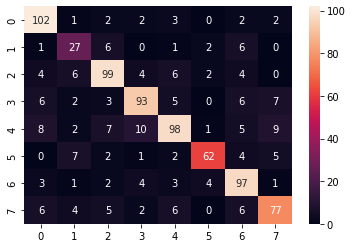

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("Accuracy Score %s " % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("Train Accuracy score %s " % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("Test Accuracy score %s " % test_acc)

Train Accuracy score 82.16391509433963 
Test Accuracy score 77.24056603773585 


In [ ]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

[0.75943396 0.7629717  0.74528302 0.76533019 0.75117925]


Implementing Scaler SVM for better results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.8419811320754716
Accuracy without Scaling: 0.7724056603773585


In [ ]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("Train Accuracy Score %s " % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("Test Accuracy Score %s " % test_acc)

Train Accuracy Score 86.02594339622641 
Test Accuracy Score 84.19811320754717 


In [ ]:
X_test.shape

(848, 40)

In [ ]:
scaled_predictions = svc_scaled.predict(X_test)

              precision    recall  f1-score   support

       angry       0.91      0.92      0.92       140
        calm       0.50      0.78      0.61        41
     disgust       0.82      0.85      0.84       116
        fear       0.95      0.79      0.86       115
       happy       0.89      0.79      0.84       111
     neutral       1.00      0.82      0.90        96
         sad       0.78      0.82      0.80       111
   surprised       0.80      0.89      0.84       118

    accuracy                           0.84       848
   macro avg       0.83      0.83      0.83       848
weighted avg       0.86      0.84      0.85       848

Accuracy Score 84.19811320754717 


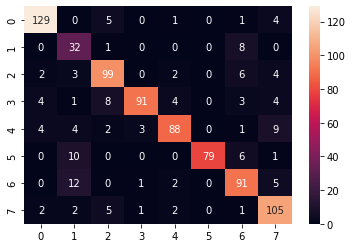

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("Accuracy Score %s " % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svc_scaled, X, y, cv = 5)
print(cv_results)

[0.82900943 0.82311321 0.82075472 0.82665094 0.84080189]


Saving Model for later use and avoid traing again and again.

In [ ]:
filename = 'Speech_Emotion_Model.sav'
pickle.dump(svc_scaled, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [ ]:
print(result)

0.8419811320754716


Testing the Model directly on audio files.


In [ ]:
path = '/content/drive/MyDrive/Speech_Emotion_Dataset/TESS/OAF_Pleasant_surprise/OAF_back_ps.wav'
loaded_model = pickle.load(open(filename, 'rb'))
X, sample_rate = librosa.load(os.path.join(path), res_type='kaiser_fast')
result123=np.array([])
mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
result123=np.hstack((result123, mfccs))
print(result123)
ans = loaded_model.predict([result123])
result123.shape
print(ans)
  

[-4.43618866e+02  9.68268051e+01 -7.95755565e-01  1.82904434e+00
  2.13972831e+00  7.00742006e+00 -1.57385530e+01  8.55393314e+00
 -1.94862270e+01  6.44964314e+00 -1.76212311e+01  1.11565733e+00
 -5.97151756e+00  2.48450398e+00 -5.28810596e+00  3.24265003e+00
 -8.30478001e+00  1.06150961e+01 -2.35592484e+00  1.81242609e+00
  8.90344799e-01  7.11553812e+00 -3.61981750e+00  5.65299940e+00
 -2.22670579e+00  3.42792869e+00 -2.65123439e+00  2.77803779e+00
 -1.34456813e+00  3.27406240e+00 -8.94153789e-02  1.89029002e+00
  1.69543731e+00 -5.84377527e-01  2.33288741e+00  1.87584984e+00
  4.46063280e+00  8.13544559e+00  1.27937841e+01  1.31227751e+01]
['surprised']
